In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('train.csv')

In [3]:
data_train

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [7]:
import re
cat_pattern = re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
cont_pattern = re.compile("^cont([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")

#sorted categorical data without using regular expession
cat_col = sorted([cat for cat in data_train.columns if 'cat' in cat], key=lambda s: int(s[3:]))

#sorted categorical data using regular expession
cat_index = [i for i in range(0, len(data_train.columns)) if cat_pattern.match(data_train.columns[i])]

#sorted categorical data without using regular expession
cont_col = sorted([cont for cont in data_train.columns if 'cont' in cont], key=lambda s: int(s[4:]))

#sorted categorical data using regular expession
cont_index = [i for i in range(0, len(data_train.columns)) if cont_pattern.match(data_train.columns[i])]

In [4]:
import re
cat_pattern = re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")

cat_index = [i for i in range(0, len(data_train.columns)) if cat_pattern.match(data_train.columns[i])]

/tmp/ipykernel_17042/2212038816.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(data_train['loss']))
/home/ali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loss', ylabel='Density'>

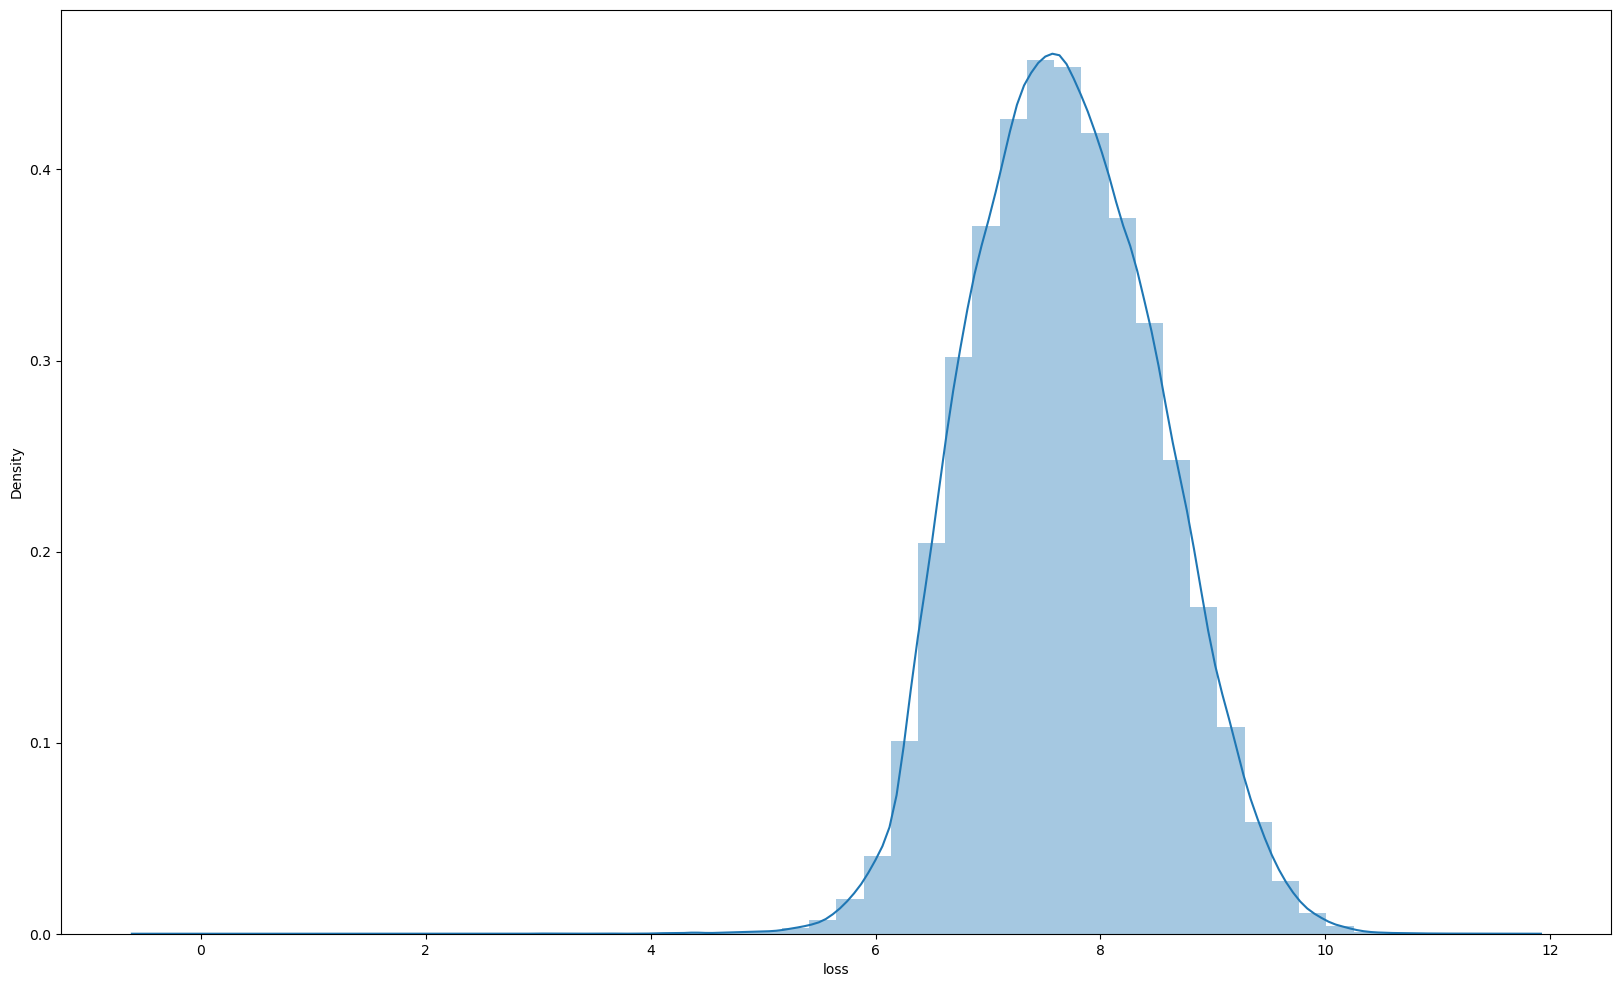

In [6]:
import seaborn as sb
plt.figure(figsize=(20, 12))
sb.distplot(np.log(data_train['loss']))

In [7]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [8]:
model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10)

In [9]:
X = data_train.drop(['id', 'loss'], axis=1)
#with using (np.log) for normalizing and preproccesing data
y = np.log(data_train['loss'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
del X
del y

In [12]:
del data_train

In [13]:
model.fit(X_train, y_train, np.asarray(cat_index) - 1, eval_set=(X_test, y_test))

0:	learn: 0.6460115	test: 0.6500452	best: 0.6500452 (0)	total: 408ms	remaining: 1m 21s
10:	learn: 0.5600665	test: 0.5634747	best: 0.5634747 (10)	total: 3.3s	remaining: 56.7s
20:	learn: 0.5149019	test: 0.5178852	best: 0.5178852 (20)	total: 6.27s	remaining: 53.5s
30:	learn: 0.4888730	test: 0.4914505	best: 0.4914505 (30)	total: 9.54s	remaining: 52s
40:	learn: 0.4730425	test: 0.4752215	best: 0.4752215 (40)	total: 12.9s	remaining: 49.9s
50:	learn: 0.4626290	test: 0.4646719	best: 0.4646719 (50)	total: 16s	remaining: 46.7s
60:	learn: 0.4546343	test: 0.4566622	best: 0.4566622 (60)	total: 19.3s	remaining: 44s
70:	learn: 0.4494301	test: 0.4513608	best: 0.4513608 (70)	total: 22.2s	remaining: 40.3s
80:	learn: 0.4450888	test: 0.4470743	best: 0.4470743 (80)	total: 25.2s	remaining: 37s
90:	learn: 0.4413862	test: 0.4433699	best: 0.4433699 (90)	total: 28.2s	remaining: 33.7s
100:	learn: 0.4389926	test: 0.4410392	best: 0.4410392 (100)	total: 31s	remaining: 30.4s
110:	learn: 0.4369088	test: 0.4389995	best

In [14]:
np.exp(0.4299908862)

1.5372435133545064

In [15]:
del X_train
del X_test
del y_train
del y_test

In [21]:
data_test = pd.read_csv('test.csv')

In [22]:
data_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [23]:
import pickle
with open('fiting_data_catregression', 'wb') as f:
    pickle.dump(model, f)